In [14]:
import pandas as pd

In [2]:
df = pd.read_csv("veh20_output/drt_customer_stats_drt.csv", sep = ";")
df

NameError: name 'pd' is not defined

In [16]:
df["rejectionRate"].values

array([0.84])

In [17]:
df_rejections = pd.read_csv("veh20_output/ITERS/it.0/0.drt_rejections_drt.csv", sep = ";")
df_rejections

,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY
0,31873.0,896,520330770008f,711229910012f,651025.997812,6.864122e+06,652231.481167,6.862849e+06
1,31874.0,81,2536486830008f,6903746890001f,650395.638593,6.858350e+06,652526.156727,6.861009e+06
2,31834.0,926,106624660004f,209978860002f,650965.778330,6.864666e+06,653098.267300,6.862401e+06
3,34753.0,22,165541130003f,35993270004f,654639.980456,6.859448e+06,652912.296377,6.858647e+06
4,34782.0,71,239518130011f,40399760014f,652789.793720,6.857624e+06,653137.738142,6.860387e+06
...,...,...,...,...,...,...,...,...
834,28752.0,300,3629265570002f,1059404310009f,654219.801307,6.863698e+06,648515.427907,6.861647e+06
835,28742.0,761,293822870005f,263039930001f,654698.283856,6.863776e+06,656354.590383,6.861637e+06
836,28734.0,941,227331970003f,6704272680002f,653304.382743,6.862910e+06,652909.866517,6.863068e+06
837,28815.0,798,689042310005f,7069906090006f,649492.954491,6.861701e+06,649814.594383,6.861523e+06


In [18]:
import shapely.geometry as sgeo
import geopandas as gpd

In [19]:
df_rejections["geometry"] = gpd.points_from_xy(df_rejections["fromX"], df_rejections["fromY"])

In [20]:
df_rejections = gpd.GeoDataFrame(df_rejections, crs = "EPSG:2154")

<Axes: >

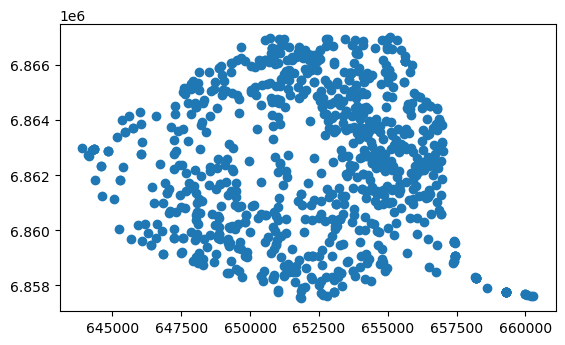

In [21]:
df_rejections.plot()

In [22]:
df = pd.read_csv("veh20_output/ITERS/it.0/0.drt_legs_drt.csv", sep = ";")
df

,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,inVehicleTravelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime
0,22186.0,60,44DRT-42,6817096320002f,652323.42,6862119.87,8797208900002f,652021.42,6859914.40,268.0,22901.0,447.0,3098.83,3098.83,0,22486,23156.5
1,25268.0,63,44DRT-8,1946087970018f,652278.36,6863182.52,18815560010f,653729.90,6858528.06,184.0,26276.0,824.0,6597.72,6597.72,0,25568,26804.0
2,25666.0,504,4DRT-0,584244890002f,651552.38,6863871.87,7450039050002f,652317.55,6864760.22,243.0,26118.0,209.0,1487.86,1487.86,0,25966,26279.5
3,26118.0,72,44DRT-42,850761710003f,652731.31,6859838.63,42171740008f,652117.30,6860699.13,192.0,26532.0,222.0,1556.73,1556.73,0,26418,26751.0
4,26295.0,303,4DRT-0,106639310012f,652036.09,6865104.94,617328530001f,647829.94,6861175.15,194.0,27508.0,1019.0,8120.22,8120.22,0,26595,28123.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,39286.0,639,44DRT-8,377762770003f,649933.97,6863597.76,51034290004f,650097.99,6863618.36,81.0,39529.0,162.0,965.18,965.18,0,39586,39829.0
155,39442.0,4,4DRT-22,1809709890004f,653747.17,6860054.05,560649660004f,654352.23,6859225.15,186.0,39807.0,179.0,1281.26,1281.26,0,39742,40010.5
156,39771.0,210,DRT-12,832396500001f,650865.62,6858337.46,8090752050003f,650841.34,6859292.73,161.0,40077.0,145.0,1517.63,1517.63,0,40071,40288.5
157,40381.0,826,4DRT-52,780549100000f,651054.26,6865245.70,226902290006f,654973.34,6865589.58,247.0,41382.0,754.0,5365.86,5365.86,0,40681,41812.0


In [23]:
df["waitTime"].mean()

217.52830188679246

In [24]:
(df["travelDistance_m"] / df["directTravelDistance_m"]).mean()

1.0498038468315052